<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-PCVK-2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok 6**
Nama: Lailatul Badriyah

Kelas: TI-3H

Absen: 14

NIM: 2141710026


---



In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

Dengan library OpenCv:

`cv.matchTemplate()` dengan parameter:

**Image** => citra input

**templ** => template yang dicari, tidak boleh lebih besar dari ukuran citra input

**method** => metode dari template matching

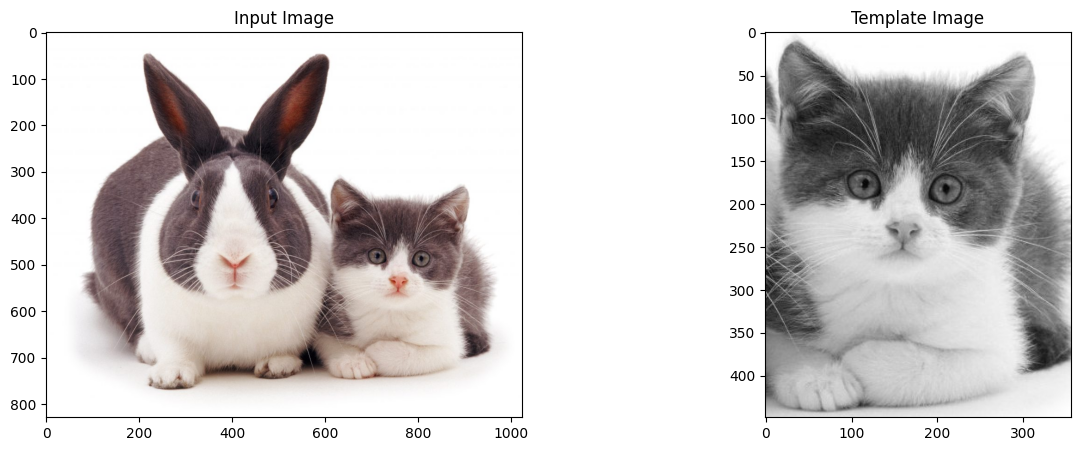

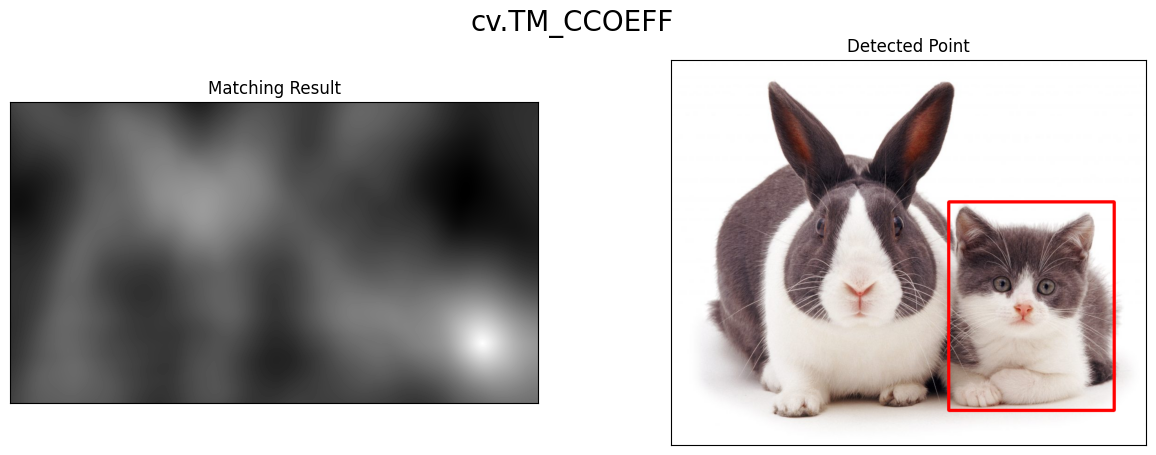

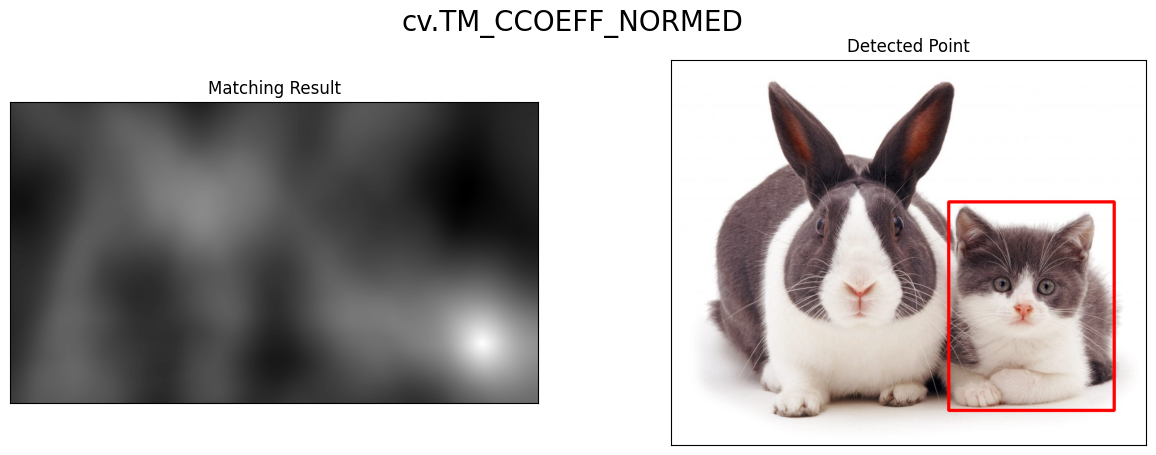

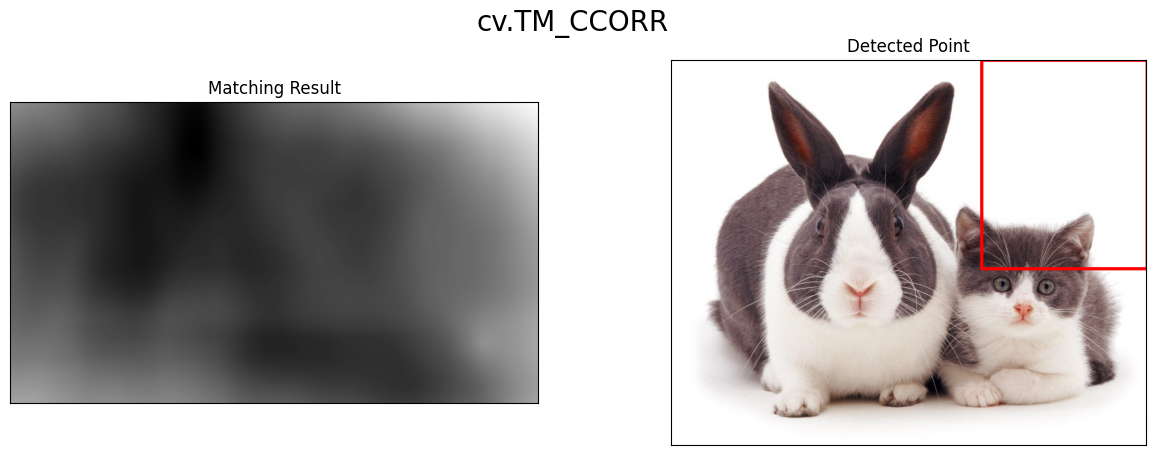

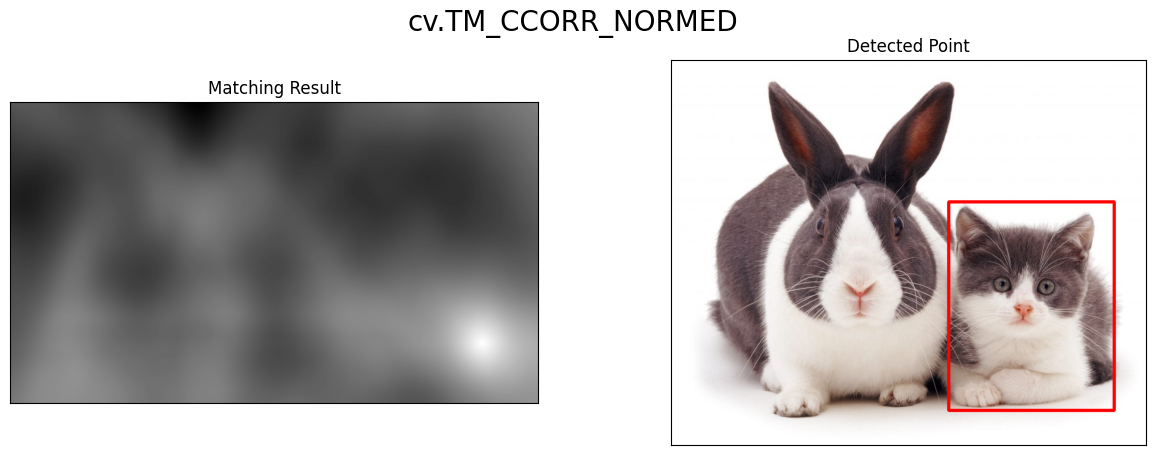

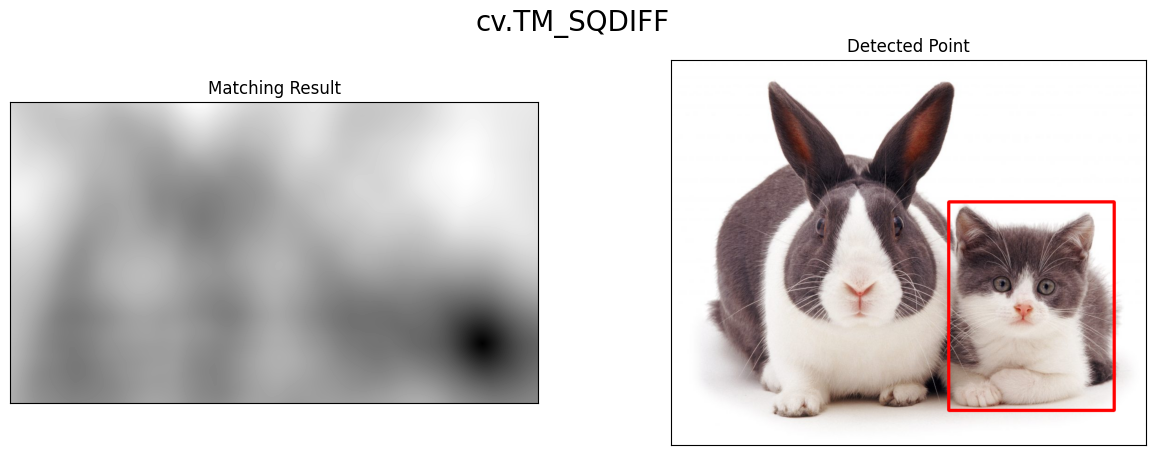

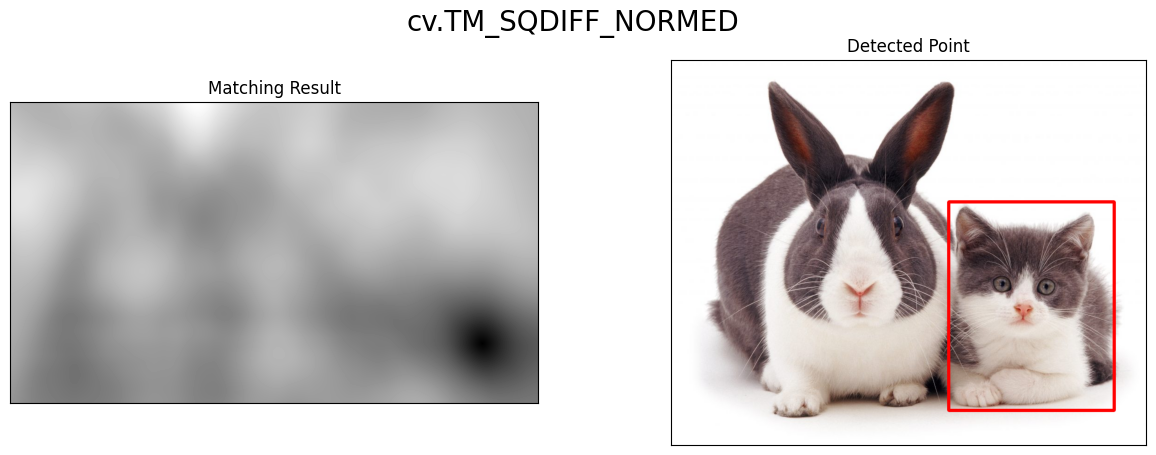

In [116]:
# Memuat citra input
img = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()

# Memuat citra template
template = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/cat2_templatejpg.jpg', 0)
# Mendapatkan dimensi template
w, h = template.shape[::-1]

# Menampilkan citra input dan template secara berdampingan
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("Input Image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("Template Image")

# Daftar metode perbandingan
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Iterasi melalui setiap metode
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Terapkan template matching
    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Tentukan titik pojok kiri atas berdasarkan metode yang digunakan
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar persegi panjang di sekitar area yang terdeteksi
    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 5)

    # Plot hasil perbandingan dan titik yang terdeteksi
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()

Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template.

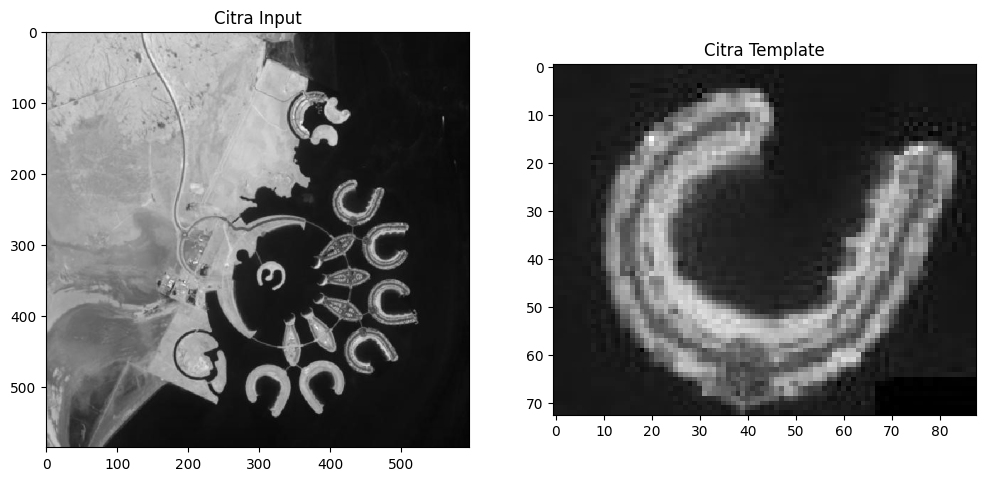

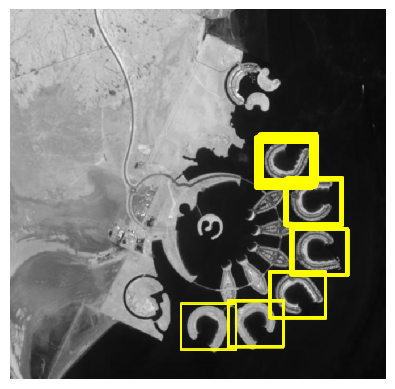

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import match_template

# Memuat citra input dan citra template
img_path = '/content/drive/MyDrive/PCVK/week11/Object Detection/bahrain.jpg'
template_path = '/content/drive/MyDrive/PCVK/week11/Object Detection/bahrain-template.jpg'

img = color.rgb2gray(io.imread(img_path))
template = color.rgb2gray(io.imread(template_path))

# Menampilkan citra input dan citra template
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].imshow(img, cmap='gray')
axarr[0].set_title("Citra Input")
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title("Citra Template")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()

height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.5)
    ax.add_patch(rect)

plt.show()

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg.

**a. Sobel Edge Detection**

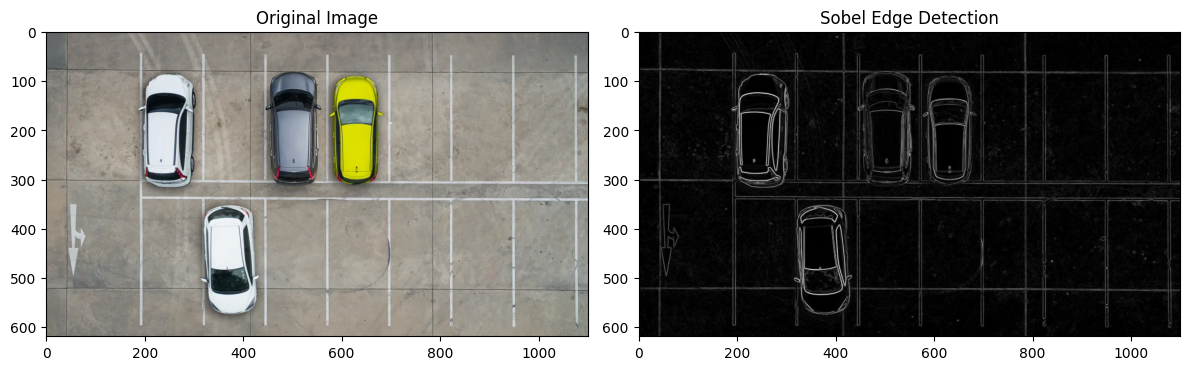

In [118]:
# Memuat gambar
img = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/car-park.jpg')

# Mengubah ke skala keabuan
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mengubah ke format RGB untuk ditampilkan
img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Deteksi Tepi dengan Sobel
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)

# Menggabungkan gradien Sobel x dan y
sobel_combined = np.hypot(sobel_x, sobel_y)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()

**b. Canny Edge Detection**

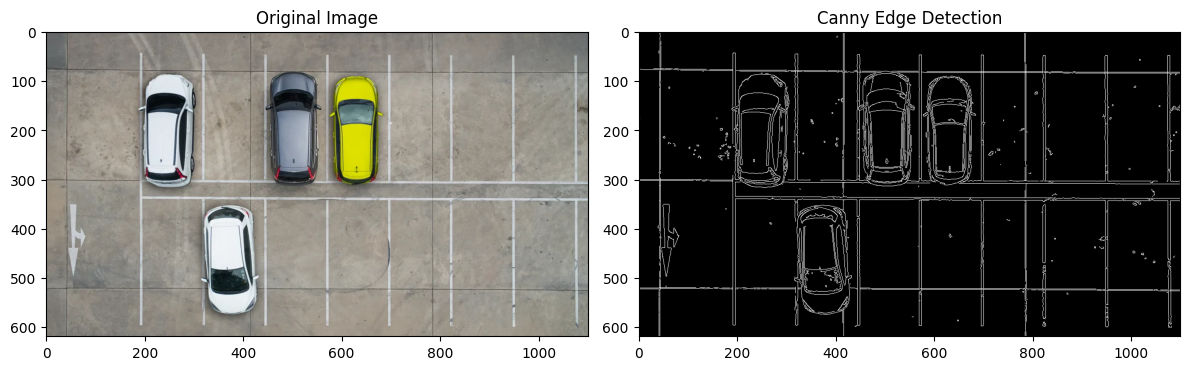

In [119]:
# Memuat gambar
img = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/car-park.jpg')

# Mengubah ke skala keabuan
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mengubah ke format RGB untuk ditampilkan
img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Deteksi Tepi dengan Sobel
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)

# Menggabungkan gradien Sobel x dan y
sobel_combined = np.hypot(sobel_x, sobel_y)

# Canny Edge Detection
edged = cv.Canny(img_gray, 100, 200)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(edged, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()

**c. Laplacian Edge Detection**

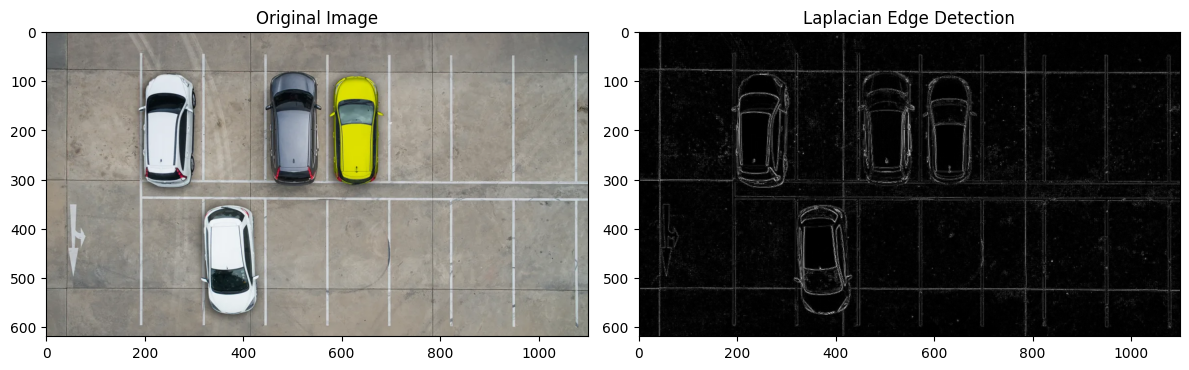

In [120]:
# Memuat gambar
img = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/car-park.jpg')

# Mengubah ke skala keabuan
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mengubah ke format RGB untuk ditampilkan
img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Laplacian Edge Detection
laplacian = cv.Laplacian(img_gray, cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.tight_layout()
plt.show()

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg.

### **a. Harris Corner Detection**

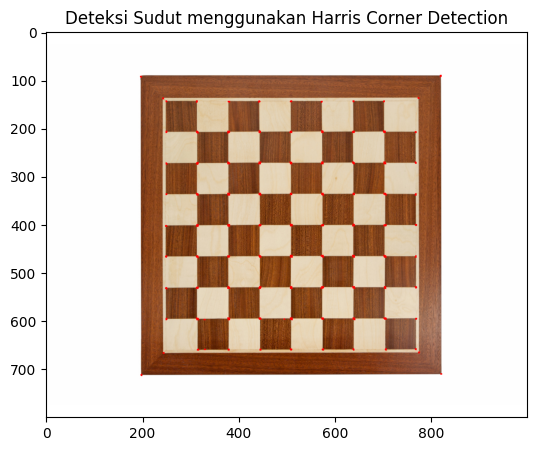

In [121]:
# Memuat gambar
img_input = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/chess-board.jpg')

# Konversi citra ke skala keabuan
gray_img = cv.cvtColor(img_input, cv.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan metode Harris Corner
gray_img = np.float32(gray_img)
dst = cv.cornerHarris(gray_img, 2, 3, 0.04)

# Dilasi sudut untuk memperjelas tanda sudut
dst = cv.dilate(dst, None)

# Threshold untuk mengoptimalkan hasil deteksi
img_input[dst > 0.01 * dst.max()] = [0, 0, 255]

# Tampilkan hasil deteksi
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB))
plt.title('Deteksi Sudut menggunakan Harris Corner Detection')
plt.show()

### **b. Shi-Tomasi Detection**

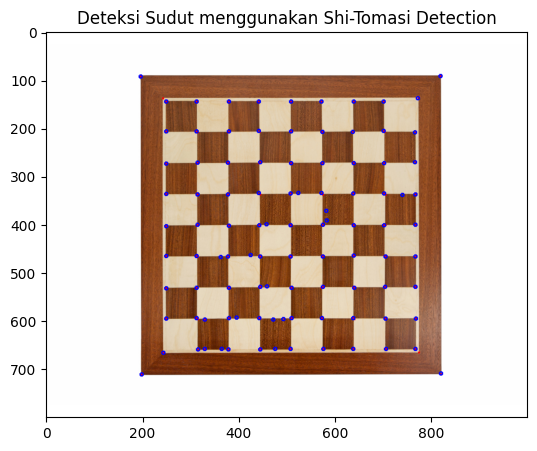

In [122]:
# Deteksi sudut menggunakan metode Shi-Tomasi
corners = cv.goodFeaturesToTrack(gray_img, 100, 0.01, 10)

# Konversi koordinat sudut ke tipe data integer
corners = np.int0(corners)

# Gambar sudut pada citra asli dengan warna biru (255, 0, 0)
for i in corners:
    x, y = i.ravel()
    cv.circle(img_input, (x, y), 3, (255, 0, 0), 2)

# Tampilkan hasil deteksi
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB))
plt.title('Deteksi Sudut menggunakan Shi-Tomasi Detection')
plt.show()

Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori.

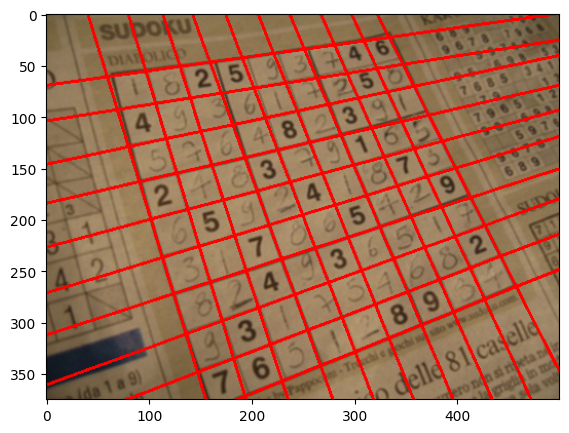

In [123]:
# Memuat gambar input
img_ht = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/sudoku.jpg')

# Mengubah gambar ke skala abu-abu
img_gray = cv.cvtColor(img_ht, cv.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan metode Canny
edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

# Dilasi pada tepi untuk menghubungkan komponen yang putus-putus
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Erosi pada tepi untuk menghilangkan noise
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Transformasi Hough untuk mendeteksi garis
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

# Memeriksa apakah garis ditemukan
if not lines.any():
    print('No lines were found')
    exit()

# Filter garis yang sejajar atau berdekatan
if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    similar_lines = {i: [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j:
                continue

            rho_i, theta_i = lines[i][0]
            rho_j, theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) * [True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])
    else:
        filtered_lines = lines

    # Menampilkan garis yang telah difilter pada gambar
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(img_ht, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Menampilkan gambar input dengan garis yang telah difilter
    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(img_ht, cv.COLOR_BGR2RGB))

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg

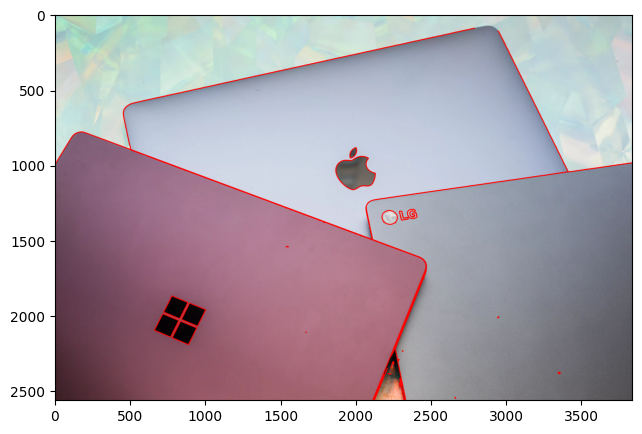

In [124]:
# Memuat gambar input
img_cd = cv.imread('/content/drive/MyDrive/PCVK/week11/Object Detection/laptop.jpg')

# Mengubah gambar ke skala abu-abu
img_gray = cv.cvtColor(img_cd, cv.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan metode Canny dengan threshold 30 dan 200
edged = cv.Canny(img_gray, 30, 200)

# Menemukan kontur pada gambar yang telah dideteksi tepinya
# Mode RETR_EXTERNAL mengambil hanya kontur terluar
# CHAIN_APPROX_NONE menyimpan semua titik kontur tanpa aproksimasi
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Menggambar kontur pada gambar asli dengan warna merah (0, 0, 255) dan ketebalan garis 5
cv.drawContours(img_cd, contours, -1, (0, 0, 255), 5)

# Menyiapkan ukuran figur untuk plot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli dengan kontur yang telah digambar
plt.imshow(cv.cvtColor(img_cd, cv.COLOR_BGR2RGB))

## **Pengayaan Materi KTP**

In [125]:
import cv2
import os

168.0 (300, 493)


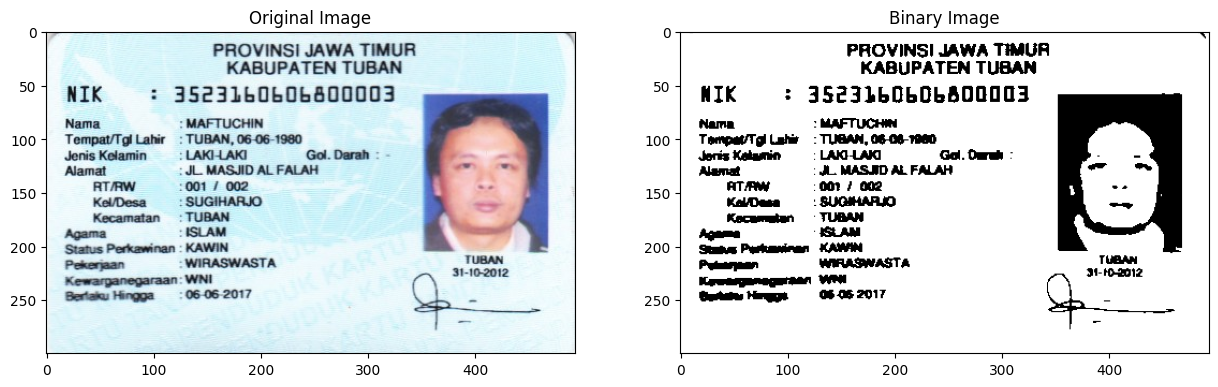

In [126]:
# Memuat gambar input
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp3.png')

# Filtering
blurred = cv2.GaussianBlur(img_ktp, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img_ktp, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Original Image")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Binary Image")
plt.show()

Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

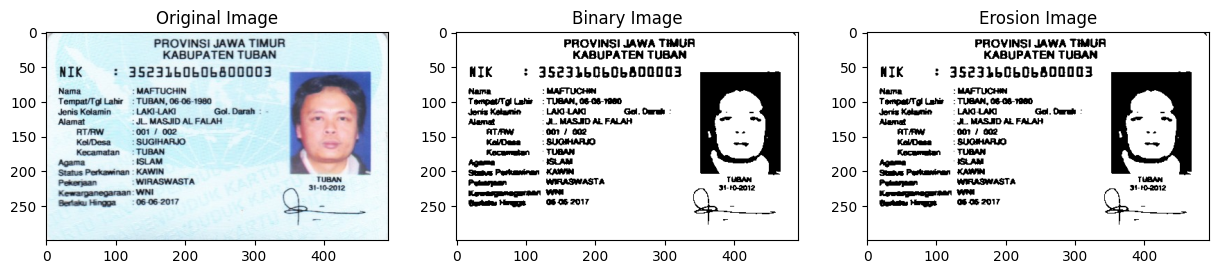

In [127]:
# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img_ktp, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Original Image")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Binary Image")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Erosion Image")
plt.show()

Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

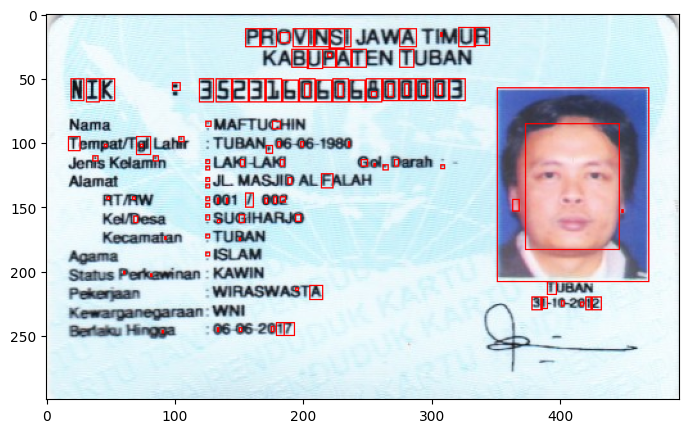

In [128]:
# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(img_ktp, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB))

## **Tugas Praktikum**

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

Kelompok 1 – KTP Riyanto Sleman

Kelompok 2 – KTP Galang Raka Bengkulu

Kelompok 3 – KTP Arief Wijaya Cimahi

Kelompok 4 – KTP Edo Nias

Kelompok 5 – KTP Widiarso Bekasi

Kelompok 6 – KTP Abdurrauf Soppeng

**Kelompok 6**

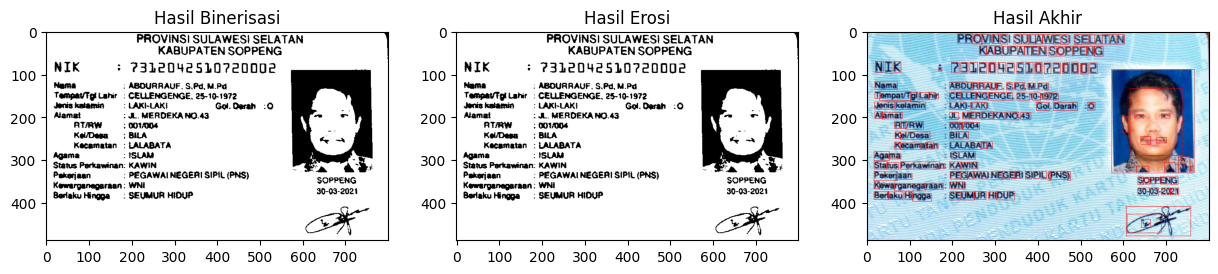

In [152]:
img_ktp7 = cv.imread('/content/drive/MyDrive/PCVK/ktp/KTP7.jpeg')

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(img_ktp7, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(img_ktp7, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(img_ktp7, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(img_ktp7, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil bersamaan dengan hasil binerisasi dan erosi
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Hasil binerisasi
axs[0].imshow(bw, cmap='gray')
axs[0].set_title('Hasil Binerisasi')

# Hasil erosi
axs[1].imshow(erode, cmap='gray')
axs[1].set_title('Hasil Erosi')

# Hasil akhir
axs[2].imshow(cv2.cvtColor(img_ktp7, cv2.COLOR_BGR2RGB))
axs[2].set_title('Hasil Akhir')

plt.show()